**Brian Blaylock**  
*April 28, 2021*

# ☔ Precipitation Variables
Why is accumulated precipitation always zero for the model analysis? [Check out this discussion](https://github.com/blaylockbk/HRRR_archive_download/discussions/10).


## Accumulated Precipitation

> NOTE: When cfgrib reads a grib file with more than one accumulated precipitation field, it will not read all the fields. I think this is an issue with cfgrib ([see issue here](https://github.com/ecmwf/cfgrib/issues/187)). The way around this is to key in on a single APCP field, or to specify the `stepRange` in the backend kwargs. In Herbie, you can set the searchString to be more specific regarding the ACPC line to aquire.

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc

In [2]:
h00 = Herbie("2021-04-28", fxx=0).xarray(":APCP:")

# Note the different searchString syntax needed to get the 1hr precip versus the 6hr precip
h06_1hr = Herbie("2021-04-28", fxx=6).xarray(":APCP:surface:[1-9]*-[1-9]*")
h06_6hr = Herbie("2021-04-28", fxx=6).xarray(":APCP:surface:0-[1-9]*")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-28 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\hrrr\20210428]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-28 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-28 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


In [3]:
print(f"{h00.tp.GRIB_stepRange=}")
print(f"{h06_1hr.tp.GRIB_stepRange=}")
print(f"{h06_6hr.tp.GRIB_stepRange=}")

h00.tp.GRIB_stepRange='0'
h06_1hr.tp.GRIB_stepRange='5-6'
h06_6hr.tp.GRIB_stepRange='0-6'


In [4]:
def get_ax():
    defaults = dict(
        scale="50m",
        dpi=150,
        figsize=(10, 5),
        crs=h00.herbie.crs,
    )
    return EasyMap(**defaults).STATES().OCEAN().LAND().ax

cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 00:00 UTC 28 Apr 2021 F00', 'center': 'HRRR F00 surface\n', 'right': 'Valid: 00:00 UTC 28 Apr 2021'}>

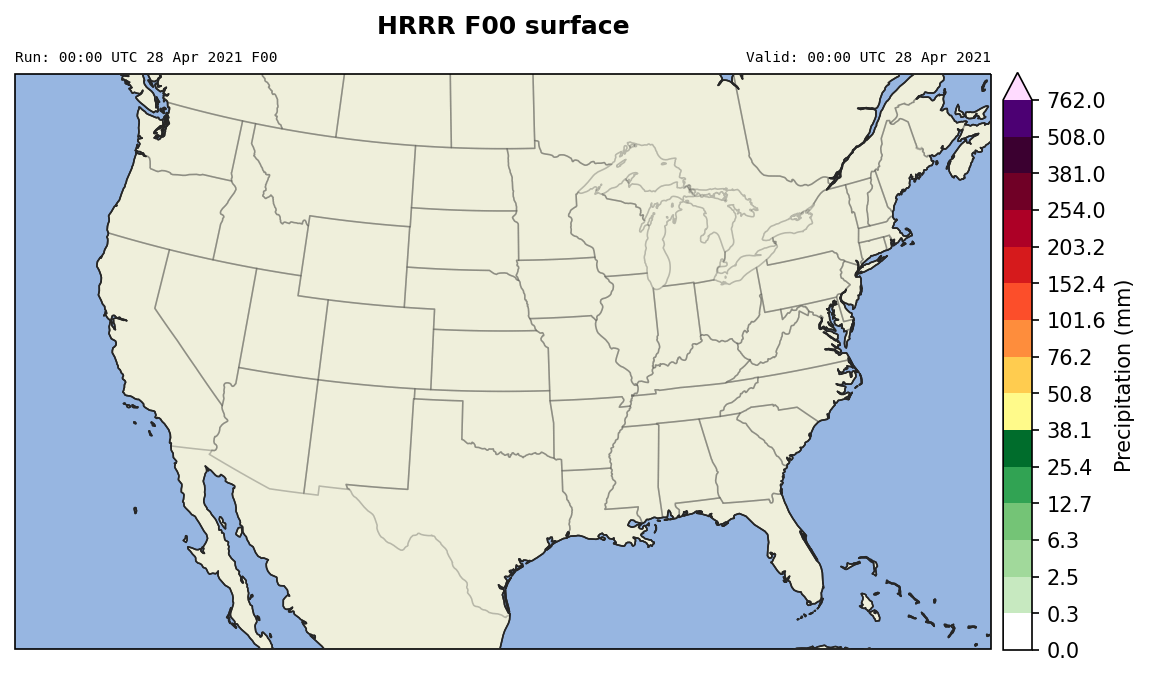

In [5]:
h00.herbie.plot(get_ax())

cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 00:00 UTC 28 Apr 2021 F06', 'center': 'HRRR F05-F06 surface\n', 'right': 'Valid: 06:00 UTC 28 Apr 2021'}>

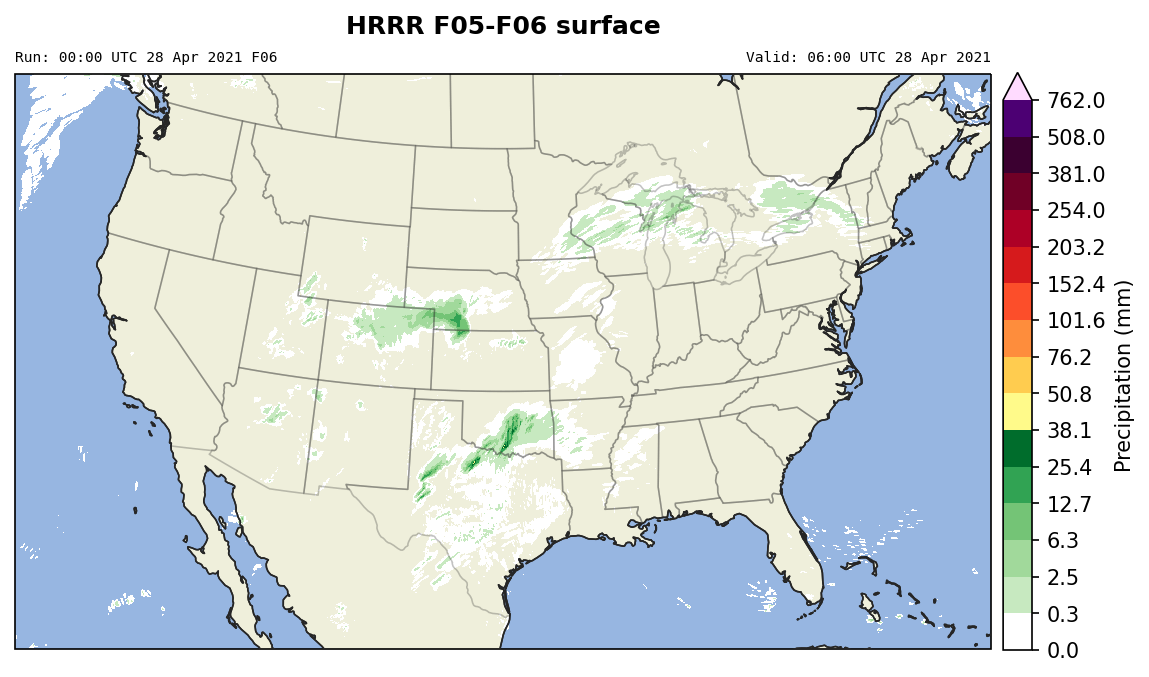

In [6]:
h06_1hr.herbie.plot(get_ax())

cfgrib variable: tp
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Total Precipitation
GRIB_units kg m**-2
GRIB_typeOfLevel surface



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 00:00 UTC 28 Apr 2021 F06', 'center': 'HRRR F00-F06 surface\n', 'right': 'Valid: 06:00 UTC 28 Apr 2021'}>

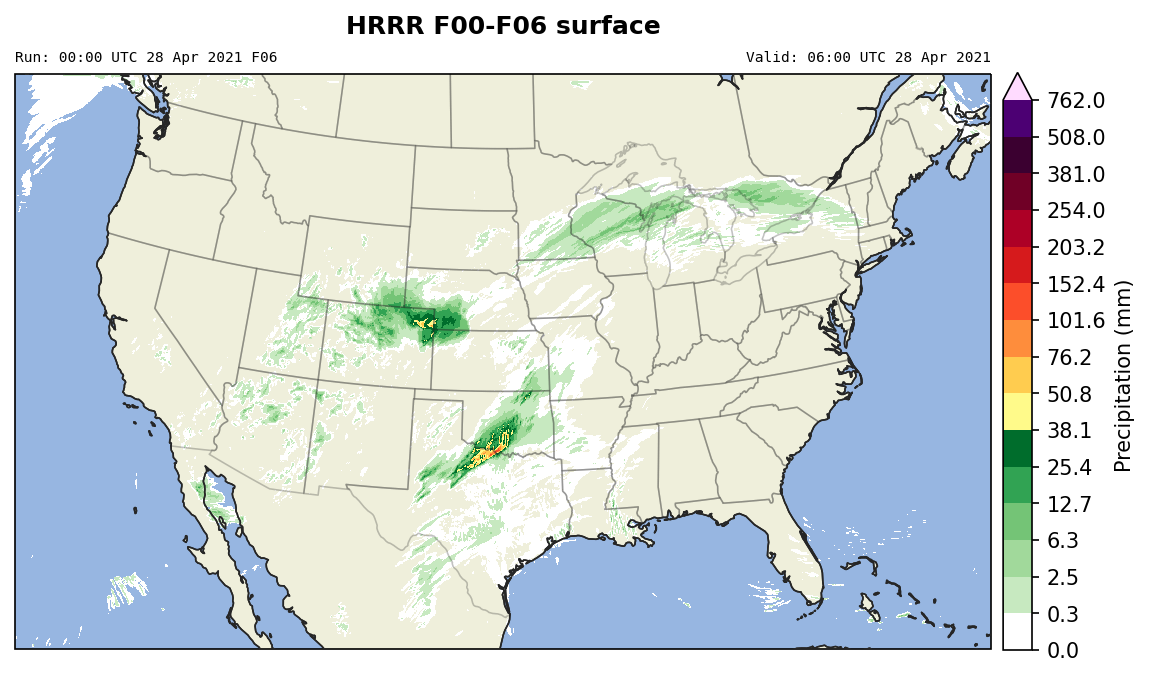

In [7]:
h06_6hr.herbie.plot(get_ax())

## Radar Reflectivity

In [8]:
href = Herbie("2021-04-28").xarray(":REFC:")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Apr-28 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


cfgrib variable: refc
GRIB_cfName unknown
GRIB_cfVarName unknown
GRIB_name Maximum/Composite radar reflectivity
GRIB_units dB
GRIB_typeOfLevel atmosphere



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "refc".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 00:00 UTC 28 Apr 2021 F00', 'center': 'HRRR  atmosphere\n', 'right': 'Valid: 00:00 UTC 28 Apr 2021'}>

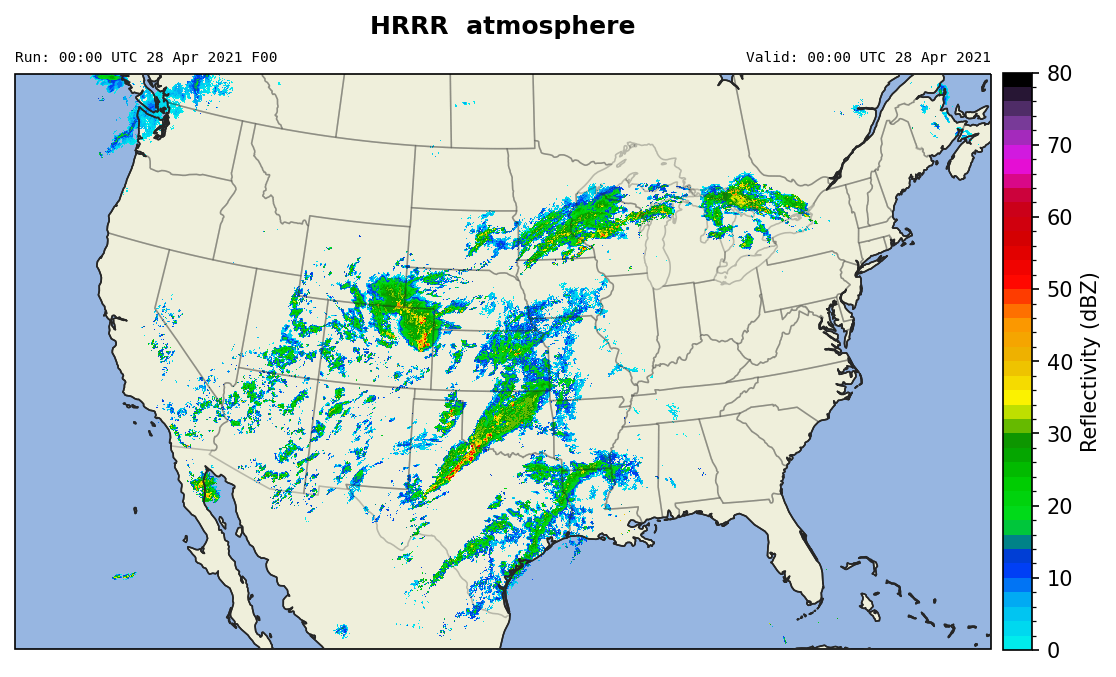

In [9]:
href.herbie.plot(get_ax())

## Precipitation Rate
It looks like the f00 precipitation rate is also an empty array.

In [10]:
hrate = Herbie("2019-04-28").xarray(":PRATE:")
hrate1 = Herbie("2019-04-28", fxx=1).xarray(":PRATE:")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Apr-28 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [C:\Users\blaylock\data\hrrr\20190428]


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2019-Apr-28 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")


cfgrib variable: prate
GRIB_cfName unknown
GRIB_cfVarName prate
GRIB_name Precipitation rate
GRIB_units kg m**-2 s**-1
GRIB_typeOfLevel surface



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "prate".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 00:00 UTC 28 Apr 2019 F00', 'center': 'HRRR  surface\n', 'right': 'Valid: 00:00 UTC 28 Apr 2019'}>

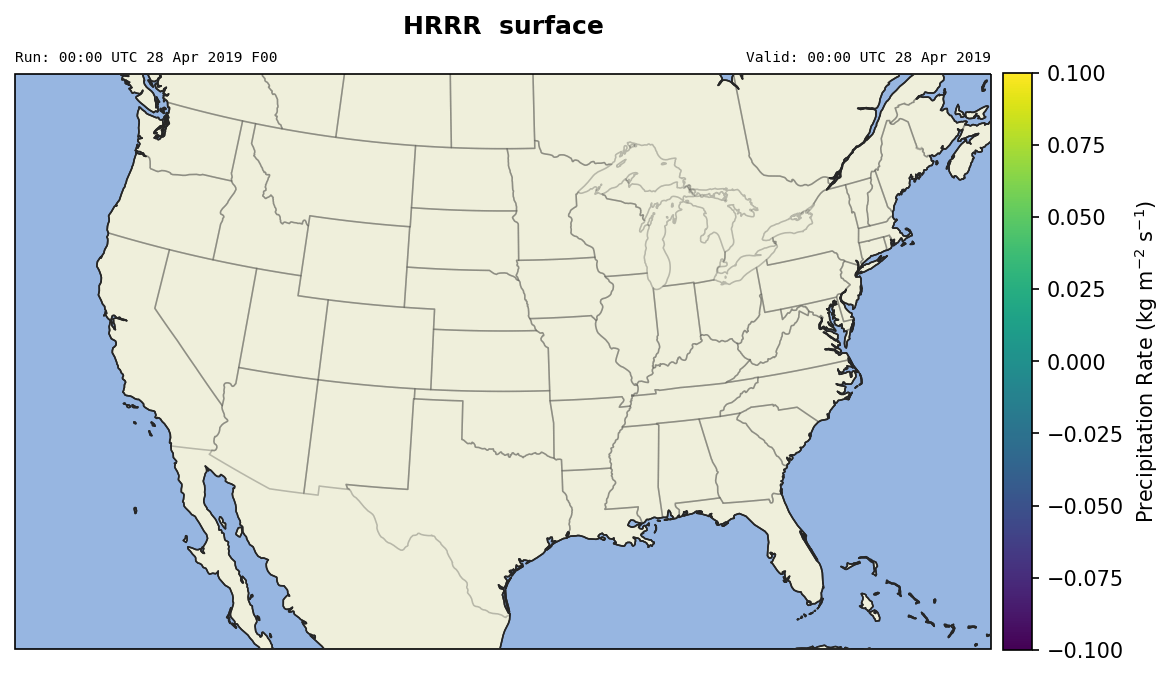

In [11]:
hrate["prate"] = hrate.prate.where(hrate.prate != 0)
hrate.herbie.plot(get_ax())

cfgrib variable: prate
GRIB_cfName unknown
GRIB_cfVarName prate
GRIB_name Precipitation rate
GRIB_units kg m**-2 s**-1
GRIB_typeOfLevel surface



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "prate".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot: title={'left': 'Run: 00:00 UTC 28 Apr 2019 F01', 'center': 'HRRR  surface\n', 'right': 'Valid: 01:00 UTC 28 Apr 2019'}>

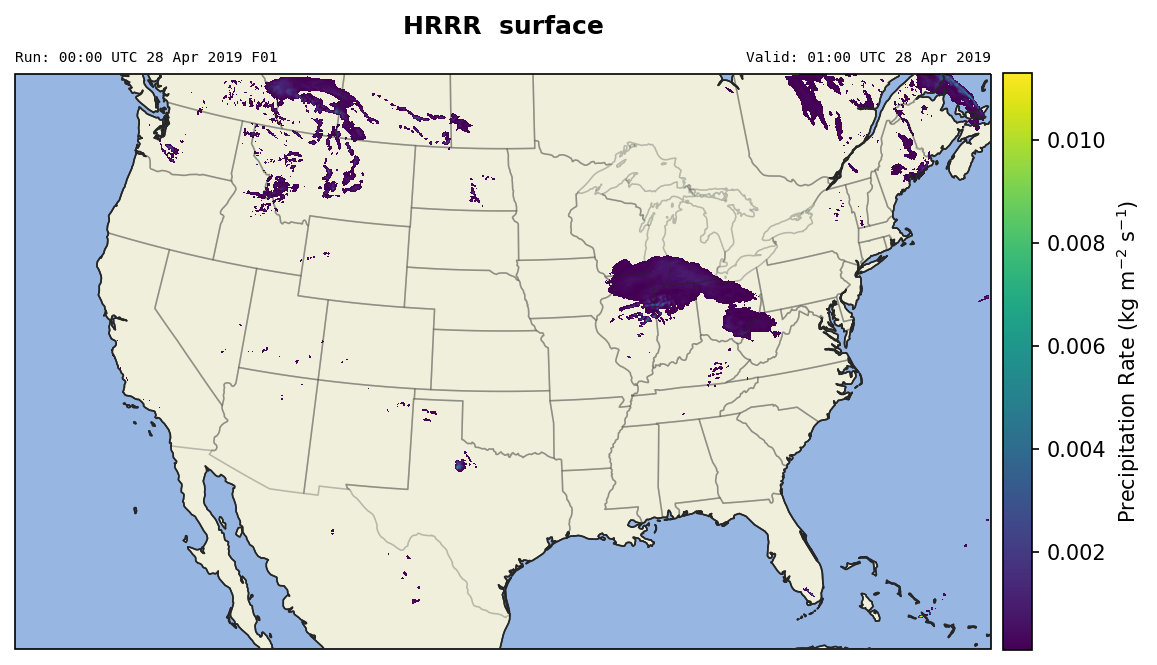

In [12]:
hrate1["prate"] = hrate1.prate.where(hrate1.prate != 0)
hrate1.herbie.plot(get_ax())